In [1]:
from google.colab import files
uploaded = files.upload()


Saving 7. Predict Credit Card Fraud.csv to 7. Predict Credit Card Fraud.csv


Confusion Matrix:
[[55355  1509]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



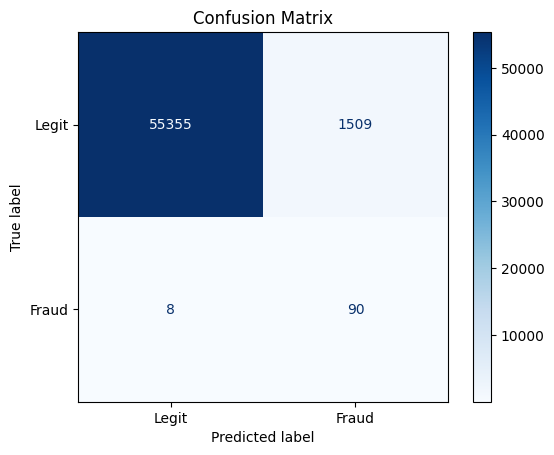

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("7. Predict Credit Card Fraud.csv")

# Drop 'Time' column
df = df.drop(columns=['Time'])

# Separate features and label
X = df.drop(columns=['Class'])
y = df['Class']

# Scale 'Amount'
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Balance the training data using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrix visually
labels = ['Legit', 'Fraud']
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
